In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nps_chat.zip.
[nltk_data]    | Downloading package omw to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package omw-1.4 to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data

[nltk_data]    |   Unzipping corpora\verbnet3.zip.
[nltk_data]    | Downloading package webtext to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\webtext.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\word2vec_sample.zip.
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Users\1006y\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\wordnet2022.zip.
[nltk_data]    | Downloading package wo

True

In [3]:
df=pd.read_csv('Dataset.csv')

# Exploratory Data Analysis (EDA)

In [4]:
df.head()

,ReB25+A1:T2+A1:A1:U1,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df.isnull()

,ReB25+A1:T2+A1:A1:U1,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

ReB25+A1:T2+A1:A1:U1    0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [14]:
df.columns

Index(['ReB25+A1:T2+A1:A1:U1', 'Restaurant Name', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ReB25+A1:T2+A1:A1:U1  9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9551, dtype: bool

# LEVEL-3

# TASK 1

Task: Restaurant Reviews

Q1] Analyze the text reviews to identify the most common positive and negative keywords.

In [19]:
analyzer=SentimentIntensityAnalyzer()

def get_emotions(txt):
    scores=analyzer.polarity_scores(txt)
    sentiments=1 if scores["pos"]>0 else 0
    return sentiments

df['sentiments']=df['Rating text'].apply(get_emotions)
df.head(5)

,ReB25+A1:T2+A1:A1:U1,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,sentiments
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,1
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,1
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,1
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,1


In [20]:
df["Rating text"].unique()


array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [21]:
df[["Rating text","sentiments"]].value_counts()

Rating text  sentiments
Average      0             3737
Not rated    0             2148
Good         1             2100
Very Good    1             1079
Excellent    1              301
Poor         0              186
Name: count, dtype: int64

When praising something, "Good" is the most likely description, followed by "Very good" and "Excellent," which show increasing levels of satisfaction. In contrast, when expressing negativity, "Average" suggests neutrality, while "Not rated" implies indifference and "Poor" indicates clear dissatisfaction.

Q2] Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [23]:
df[["Rating text","Aggregate rating"]]
def find_len(txt):
    ratings=len(txt)
    return ratings
df["rate_length"]=df["Rating text"].apply(find_len)
df.head(3)

,ReB25+A1:T2+A1:A1:U1,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,sentiments,rate_length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,1,9
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,1,9
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,1,9


In [24]:
df[["Rating text","rate_length"]].value_counts()

Rating text  rate_length
Average      7              3737
Not rated    9              2148
Good         4              2100
Very Good    9              1079
Excellent    9               301
Poor         4               186
Name: count, dtype: int64

In [25]:
#calculate the average length of reviews
df["rate_length"].mean()

7.020730813527379

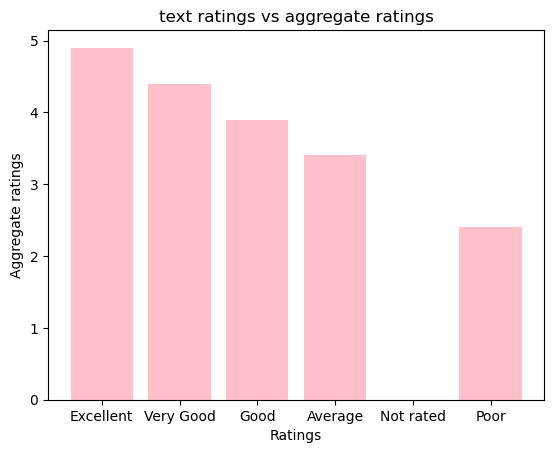

In [28]:
x=df["Rating text"]
y=df["Aggregate rating"]
plt.bar(x,y,color="pink")
plt.xlabel("Ratings")
plt.ylabel("Aggregate ratings")
plt.title("text ratings vs aggregate ratings")
plt.show()

The analysis demonstrates that review length has no significant impact on sentiment ratings. Users primarily base their "good", "neutral", or "bad" evaluations on the perceived quality of the service, irrespective of the review's length. It's noteworthy that "Excellent" is the positive rating with length 9, while "Not rated" and "average" are of same length .

# TASK 2

Task: Votes Analysis

Q3] Identify the restaurants with the highest and lowest number of votes.

In [31]:
df[["Restaurant Name","Votes"]].sort_values("Votes",ascending=False).head(3)

,Restaurant Name,Votes
728,Toit,10934
735,Truffles,9667
3994,Hauz Khas Social,7931


In [32]:
df[["Restaurant Name","Votes"]].sort_values("Votes",ascending=True).head(3)

,Restaurant Name,Votes
5799,Khalsa Eating Point,0
7411,Radha Swami Chaat Bhandar,0
7414,Ram Ram Ji Kachori Bhandar,0


In [33]:
highest=df.loc[728,["Restaurant Name","Votes"]]
lowest=df.loc[5799,["Restaurant Name","Votes"]]
print("Highest votes:",highest)
print("Lowest votes:",lowest)

Highest votes: Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object
Lowest votes: Restaurant Name    Khalsa Eating Point
Votes                                0
Name: 5799, dtype: object


Q4] Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [42]:
numeric_df = df.select_dtypes(include=['number'])
# Apply background gradient to correlation matrix
styled_corr = numeric_df.corr().style.background_gradient(cmap='BuPu')
# Display the styled correlation matrix
styled_corr

,ReB25+A1:T2+A1:A1:U1,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,sentiments,rate_length
ReB25+A1:T2+A1:A1:U1,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023,-0.048904,0.266582
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530,0.360383,0.062912
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101,-0.224656,-0.058147
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962,-0.083505,-0.103109
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783,0.058126,0.023377
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444,0.449547,-0.134901
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691,0.625038,-0.478885
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000,0.381132,0.014441
sentiments,-0.048904,0.360383,-0.224656,-0.083505,0.058126,0.449547,0.625038,0.381132,1.000000,-0.412400
rate_length,0.266582,0.062912,-0.058147,-0.103109,0.023377,-0.134901,-0.478885,0.014441,-0.412400,1.000000


# TASK 3

Task: Price Range vs. Online Delivery and Table Booking

Q5] Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [41]:
df['Has Table booking'] = df['Has Table booking'].map({'Yes': True, 'No': False})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'No': False})

# Group by price range and calculate the percentage of restaurants with table booking and online delivery
price_range_analysis = df.groupby('Price range').agg({
    'Has Table booking': lambda x: (x.sum() / len(x)) * 100,
    'Has Online delivery': lambda x: (x.sum() / len(x)) * 100
}).rename(columns={'Has Table booking': 'Table Booking (%)', 'Has Online delivery': 'Online Delivery (%)'})

print(price_range_analysis)

             Table Booking (%)  Online Delivery (%)
Price range                                        
1                          0.0                  0.0
2                          0.0                  0.0
3                          0.0                  0.0
4                          0.0                  0.0


Q6] Determine if higher-priced restaurants are more likely to offer these services.

In [39]:
# Group by price range and calculate the average availability of table booking and online delivery
avg_availability = df.groupby('Price range').agg({
    'Has Table booking': 'mean',
    'Has Online delivery': 'mean'
}).rename(columns={'Has Table booking': 'Table Booking (%)', 'Has Online delivery': 'Online Delivery (%)'})

print(avg_availability)

             Table Booking (%)  Online Delivery (%)
Price range                                        
1                     0.000225             0.157741
2                     0.076775             0.413106
3                     0.457386             0.291903
4                     0.467577             0.090444
